In [ ]:
#https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

Importing packages and csv files

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()

In [2]:
City = pd.read_csv('GlobalLandTemperaturesByCity.csv')
Country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
MajorCity = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
State = pd.read_csv('GlobalLandTemperaturesByState.csv')
Global = pd.read_csv('GlobalTemperatures.csv')

EDA

In [21]:
Global.describe().T

,count,mean,std,min,25%,50%,75%,max
LandAverageTemperature,3180.0,8.374731,4.381310,-2.080,4.31200,8.6105,12.54825,19.021
LandAverageTemperatureUncertainty,3180.0,0.938468,1.096440,0.034,0.18675,0.3920,1.41925,7.880
LandMaxTemperature,1992.0,14.350601,4.309579,5.900,10.21200,14.7600,18.45150,21.320
LandMaxTemperatureUncertainty,1992.0,0.479782,0.583203,0.044,0.14200,0.2520,0.53900,4.373
LandMinTemperature,1992.0,2.743595,4.155835,-5.407,-1.33450,2.9495,6.77875,9.715
LandMinTemperatureUncertainty,1992.0,0.431849,0.445838,0.045,0.15500,0.2790,0.45825,3.498
LandAndOceanAverageTemperature,1992.0,15.212566,1.274093,12.475,14.04700,15.2510,16.39625,17.611
LandAndOceanAverageTemperatureUncertainty,1992.0,0.128532,0.073587,0.042,0.06300,0.1220,0.15100,0.457


In [23]:
Global.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
City.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,8235082.0,16.727433,10.353442,-42.704,10.299,18.831,25.210,39.651
AverageTemperatureUncertainty,8235082.0,1.028575,1.129733,0.034,0.337,0.591,1.349,15.396


In [24]:
City.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [25]:
Country.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,544811.0,17.193354,10.953966,-37.658,10.025,20.901,25.814,38.842
AverageTemperatureUncertainty,545550.0,1.019057,1.201930,0.052,0.323,0.571,1.206,15.003


In [26]:
Country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [27]:
MajorCity.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,228175.0,18.125969,10.024800,-26.772,12.71,20.428,25.918,38.283
AverageTemperatureUncertainty,228175.0,0.969343,0.979644,0.040,0.34,0.592,1.320,14.037


In [28]:
MajorCity.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [29]:
State.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,620027.0,8.993111,13.772150,-45.389,-0.693,11.199,19.899,36.339
AverageTemperatureUncertainty,620027.0,1.287647,1.360392,0.036,0.316,0.656,1.850,12.646


In [30]:
State.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


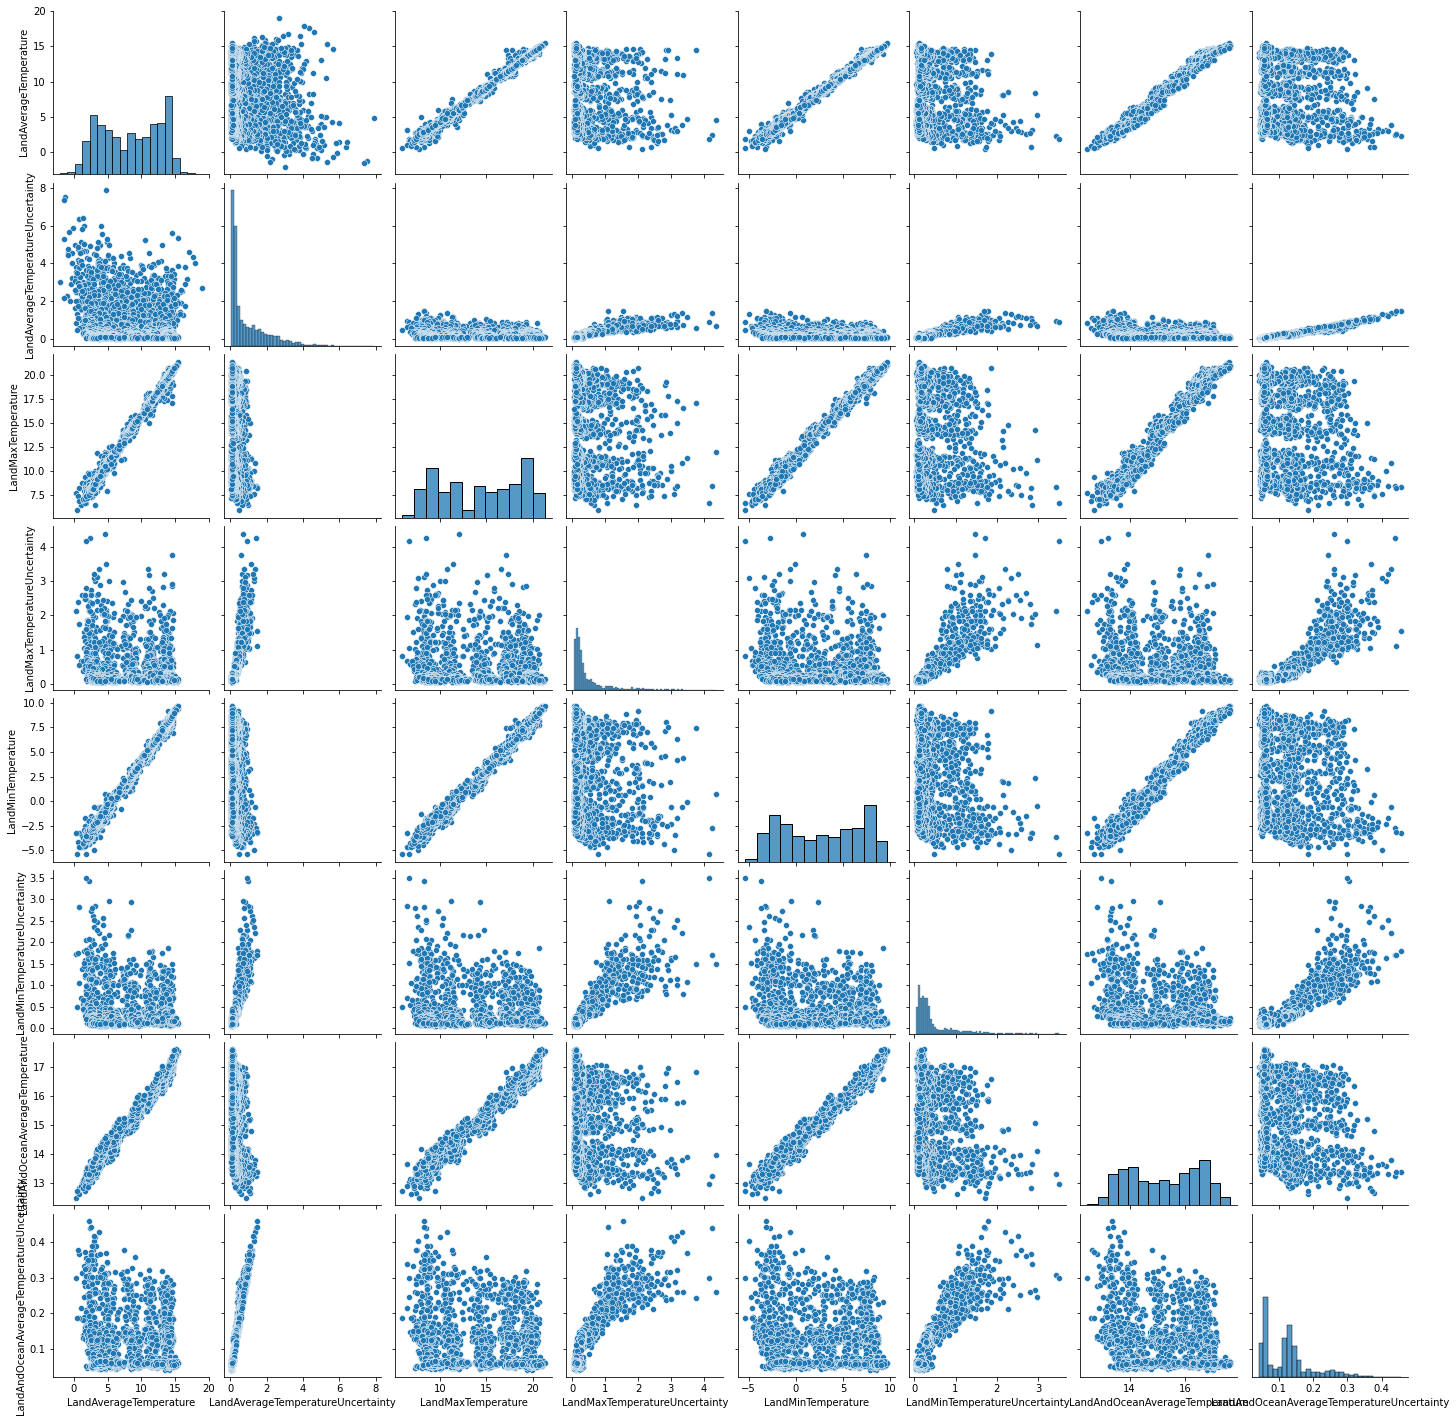

In [37]:
sns.pairplot(Global)

In [38]:
Global.corr()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
LandAverageTemperature,1.000000,-0.204191,0.995807,-0.108462,0.995611,-0.167451,0.988066,-0.131412
LandAverageTemperatureUncertainty,-0.204191,1.000000,-0.132905,0.866944,-0.165066,0.888717,-0.208008,0.972405
LandMaxTemperature,0.995807,-0.132905,1.000000,-0.105349,0.993404,-0.160020,0.983855,-0.120563
LandMaxTemperatureUncertainty,-0.108462,0.866944,-0.105349,1.000000,-0.123251,0.868702,-0.163396,0.860425
LandMinTemperature,0.995611,-0.165066,0.993404,-0.123251,1.000000,-0.185512,0.986402,-0.154931
LandMinTemperatureUncertainty,-0.167451,0.888717,-0.160020,0.868702,-0.185512,1.000000,-0.221746,0.880062
LandAndOceanAverageTemperature,0.988066,-0.208008,0.983855,-0.163396,0.986402,-0.221746,1.000000,-0.203072
LandAndOceanAverageTemperatureUncertainty,-0.131412,0.972405,-0.120563,0.860425,-0.154931,0.880062,-0.203072,1.000000


Checking datatypes and modifying date column to datetime

In [50]:
Global.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [3]:
Global['dt'] = pd.to_datetime(Global['dt'], errors='coerce')
City['dt'] = pd.to_datetime(City['dt'], errors='coerce')
State['dt'] = pd.to_datetime(State['dt'], errors='coerce')
MajorCity['dt'] = pd.to_datetime(MajorCity['dt'], errors='coerce')
Country['dt'] = pd.to_datetime(Country['dt'], errors='coerce')

In [73]:
Global.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
dtype: object

Adding month and year columns to dataframes

In [5]:
Global['year'] = Global['dt'].dt.year
Global['month'] = Global['dt'].dt.month

In [4]:
Country['year'] = Country['dt'].dt.year
Country['month'] = Country['dt'].dt.month

In [12]:
MajorCity['year'] = MajorCity['dt'].dt.year
MajorCity['month'] = MajorCity['dt'].dt.month

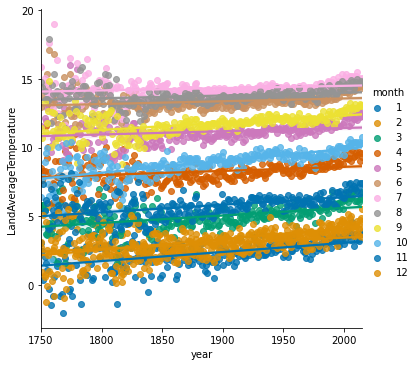

In [6]:
#Plotting global temperatures split out by month
sns.lmplot(x = 'year', y = 'LandAverageTemperature', data = Global, hue = 'month', palette = 'colorblind')

Checking for and removing null value rows for 'LandAverageTemperature'

In [100]:
Global.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
year                                            0
month                                           0
dtype: int64

In [7]:
Global.dropna(subset=['LandAverageTemperature'], inplace=True)

In [9]:
#Splitting data up by month
GlobalJan = Global[(Global['month'] == 1) & (Global['year'] >= 1850)]
GlobalFeb = Global[(Global['month'] == 2) & (Global['year'] >= 1850)]
GlobalMar = Global[(Global['month'] == 3) & (Global['year'] >= 1850)]
GlobalApr = Global[(Global['month'] == 4) & (Global['year'] >= 1850)]
GlobalMay = Global[(Global['month'] == 5) & (Global['year'] >= 1850)]
GlobalJune = Global[(Global['month'] == 6) & (Global['year'] >= 1850)]
GlobalJuly = Global[(Global['month'] == 7) & (Global['year'] >= 1850)]
GlobalAug = Global[(Global['month'] == 8) & (Global['year'] >= 1850)]
GlobalSep = Global[(Global['month'] == 9) & (Global['year'] >= 1850)]
GlobalOct = Global[(Global['month'] == 10) & (Global['year'] >= 1850)]
GlobalNov = Global[(Global['month'] == 11) & (Global['year'] >= 1850)]
GlobalDec = Global[(Global['month'] == 12) & (Global['year'] >= 1850)]

In [10]:
#Fit predictor and target variables using linear regression
X = GlobalFeb['year'].values.reshape(-1,1)
Y = GlobalFeb['LandAverageTemperature']
linreg.fit(X, Y)
print(linreg.coef_,linreg.intercept_)

[0.01063943] -17.484189203192734


In [11]:
#R Score
linreg.score(X, Y)

0.5119743166648936

In [12]:
# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
                                                    #, random_state=42)

In [13]:
#Linear Regression Find The Score
linreg.fit(X_train, y_train)
linreg.score(X_train, y_train)

0.5124943132168691

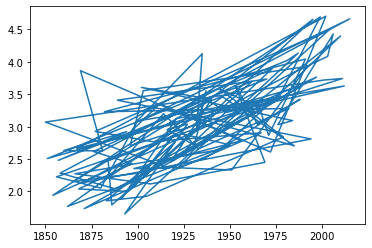

In [14]:
#Plotting training data
plt.plot(X_train, y_train)

In [15]:
#R score for testing data
linreg.score(X_test, y_test)

0.43401202260738103

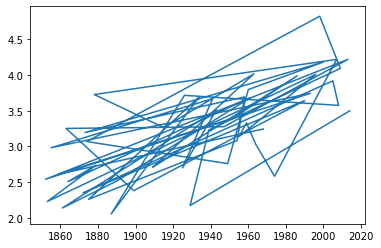

In [16]:
#Plotting testing data
plt.plot(X_test, y_test)

In [17]:
#Predicting future year temp
x = [[2023]]
linreg.predict(x)

array([4.03292603])

Checking and removing null rows for 'AverageTemperature'

In [11]:
MajorCity.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [13]:
MajorCity.dropna(subset=['AverageTemperature'], inplace=True)

In [24]:
#Removing cardinal directions from latitude and longitude in order to only have them as floats for the model
def remove_last_character(s):
    return s[:-1]

In [31]:
MajorCity['lat'] = pd.to_numeric(MajorCity['Latitude'].apply(remove_last_character))
MajorCity['long'] = pd.to_numeric(MajorCity['Longitude'].apply(remove_last_character))
print(MajorCity.head())

          dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0 1849-01-01              26.704                          1.435  Abidjan   
1 1849-02-01              27.434                          1.362  Abidjan   
2 1849-03-01              28.101                          1.612  Abidjan   
3 1849-04-01              26.140                          1.387  Abidjan   
4 1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  year  month   lat  long  
0  Côte D'Ivoire    5.63N     3.23W  1849      1  5.63  3.23  
1  Côte D'Ivoire    5.63N     3.23W  1849      2  5.63  3.23  
2  Côte D'Ivoire    5.63N     3.23W  1849      3  5.63  3.23  
3  Côte D'Ivoire    5.63N     3.23W  1849      4  5.63  3.23  
4  Côte D'Ivoire    5.63N     3.23W  1849      5  5.63  3.23  


In [32]:
MajorCity.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
year                                      int64
month                                     int64
lat                                     float64
long                                    float64
dtype: object

In [33]:
MajorCity.corr()

,AverageTemperature,AverageTemperatureUncertainty,year,month,lat,long
AverageTemperature,1.000000,-0.199380,0.146691,0.102462,-0.618512,-0.041783
AverageTemperatureUncertainty,-0.199380,1.000000,-0.748272,-0.039538,0.209666,-0.138438
year,0.146691,-0.748272,1.000000,-0.004004,-0.219520,0.090151
month,0.102462,-0.039538,-0.004004,1.000000,0.000283,0.000799
lat,-0.618512,0.209666,-0.219520,0.000283,1.000000,-0.021081
long,-0.041783,-0.138438,0.090151,0.000799,-0.021081,1.000000


In [34]:
#Splitting data up by month
MajorCityJan = MajorCity[(MajorCity['month'] == 1) & (MajorCity['year'] >= 1850)]
MajorCityFeb = MajorCity[(MajorCity['month'] == 2) & (MajorCity['year'] >= 1850)]
MajorCityMar = MajorCity[(MajorCity['month'] == 3) & (MajorCity['year'] >= 1850)]
MajorCityApr = MajorCity[(MajorCity['month'] == 4) & (MajorCity['year'] >= 1850)]
MajorCityMay = MajorCity[(MajorCity['month'] == 5) & (MajorCity['year'] >= 1850)]
MajorCityJune = MajorCity[(MajorCity['month'] == 6) & (MajorCity['year'] >= 1850)]
MajorCityJuly = MajorCity[(MajorCity['month'] == 7) & (MajorCity['year'] >= 1850)]
MajorCityAug = MajorCity[(MajorCity['month'] == 8) & (MajorCity['year'] >= 1850)]
MajorCitySep = MajorCity[(MajorCity['month'] == 9) & (MajorCity['year'] >= 1850)]
MajorCityOct = MajorCity[(MajorCity['month'] == 10) & (MajorCity['year'] >= 1850)]
MajorCityNov = MajorCity[(MajorCity['month'] == 11) & (MajorCity['year'] >= 1850)]
MajorCityDec = MajorCity[(MajorCity['month'] == 12) & (MajorCity['year'] >= 1850)]

In [51]:
#Setting X and Y values for models
y = MajorCityJan['AverageTemperature']
feature_cols = ['lat', 'year']
X = MajorCityJan[feature_cols]

In [52]:
# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [53]:
#Fitting linear regression with training data
linreg.fit(X_train, y_train)

LinearRegression()

In [54]:
linreg.coef_

array([-0.7440206 ,  0.00864533])

In [55]:
linreg.intercept_

15.188417262074548

In [57]:
print(set(zip(feature_cols, linreg.coef_)))

{('year', 0.008645327926534425), ('lat', -0.7440205994076123)}


In [58]:
#R score of training data
linreg.score(X_train, y_train)

0.7096120662373706

In [60]:
#R score of testing data
linreg.score(X_test, y_test)

0.7181812912377856

In [64]:
## Calculate Ridge Regression model

# create a model object to hold the modeling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200) #lambda in the slides

# Train the model with different regularization strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, linreg.coef_))

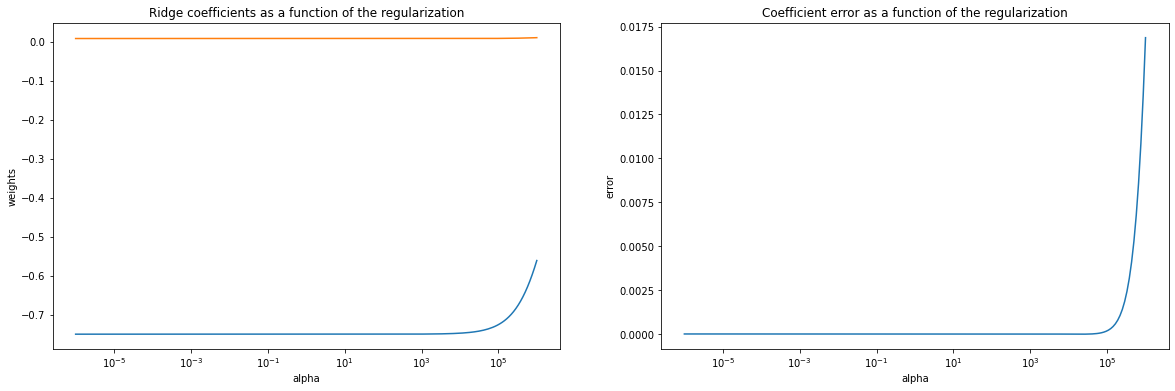

In [65]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

In [66]:
#Calculating optimal ridge
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 62225.708367302315
Score: 0.7119469053826285


In [68]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

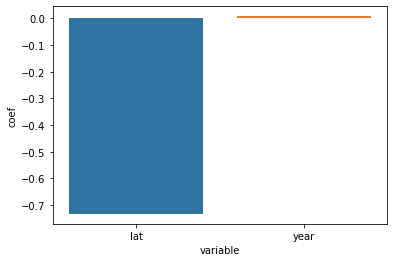

In [69]:
view_coeff(X, optimal_ridge)

In [70]:
## Calculate Lasso Regression model

# create a model object to hold the modeling parameters
clf = Lasso()
# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200) #lambda in the slides
# Train the model with different regularization strengths
for a in lasso_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, linreg.coef_))

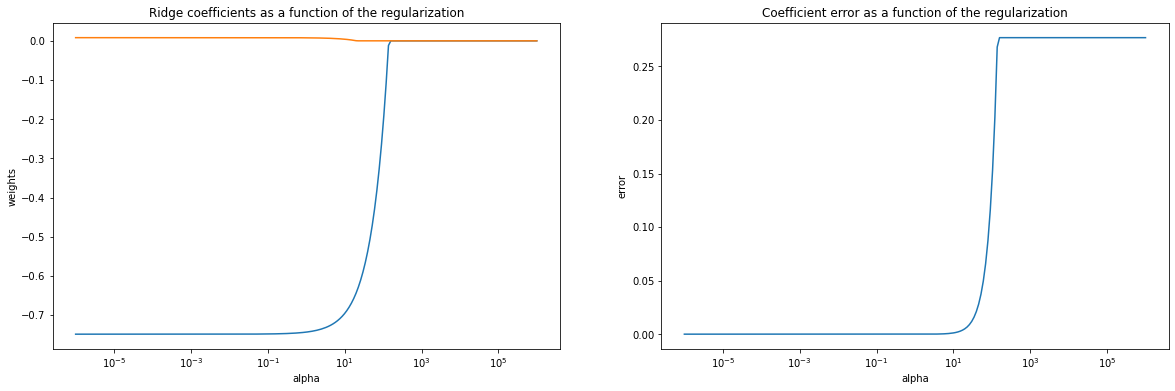

In [71]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

In [72]:
# Find Optimal Lasso Using LassoCV
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 0.7067181273927491
Score: 0.7122254377066856


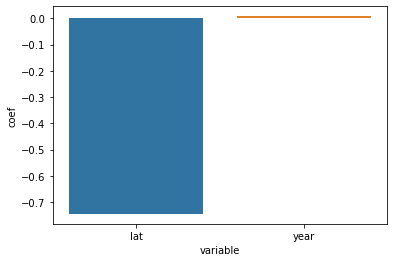

In [73]:
# Plot Coefficient
view_coeff(X, optimal_lasso)